# Twitter Charity Related Text Extraction

## Installing NLTK Library

In [36]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


Import required Libraries and Loading data to pandas dataframe

In [37]:
import pandas as pd

In [38]:
amz = pd.read_csv("./Data/actforamazon.csv")
amz.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1235091941731098625,fabioruivo,.@CBF_Futebol @RedeGlobo @Ambev @CocaCola @ita...,Wed Mar 04 06:37:20 +0000 2020,04/03/2020 06:37:20,NaN,NaN,NaN,NaN,17015247,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1164275859...,793,282,Pale Blue Dot,http://twitter.com/fabioruivo/statuses/1235091...,"{""hashtags"":[{""text"":""WorldCup2014"",""indices"":..."
1,1235071327775539200,jaimevargasnae,RT @confeniae1: En las profundidades de la sel...,Wed Mar 04 05:15:25 +0000 2020,04/03/2020 05:15:25,NaN,NaN,NaN,NaN,890896112642646016,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/9135326966...,37509,192,"Morona Santiago, Ecuador",http://twitter.com/jaimevargasnae/statuses/123...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2,1234968672856428544,WaoResistencia,RT @confeniae1: En las profundidades de la sel...,Tue Mar 03 22:27:30 +0000 2020,03/03/2020 22:27:30,NaN,NaN,NaN,NaN,1100052094365720576,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1100056401...,3237,865,NaN,http://twitter.com/WaoResistencia/statuses/123...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
3,1234963918734417928,confeniae1,En las profundidades de la selva amazónica hab...,Tue Mar 03 22:08:37 +0000 2020,03/03/2020 22:08:37,NaN,NaN,1.321463e+09,confeniae1,1321462820,1.234964e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/9964613968...,33941,991,Amazonía Ecuatoriana,http://twitter.com/confeniae1/statuses/1234963...,"{""hashtags"":[{""text"":""AmazoníaSagrada"",""indice..."
4,1234963918734417928,confeniae1,En las profundidades de la selva amazónica hab...,Tue Mar 03 22:08:37 +0000 2020,03/03/2020 22:08:37,NaN,NaN,1.321463e+09,confeniae1,1321462820,1.234964e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/9964613968...,33941,991,Amazonía Ecuatoriana,http://twitter.com/confeniae1/statuses/1234963...,"{""hashtags"":[{""text"":""AmazoníaSagrada"",""indice..."


In [39]:
amz.shape

(5, 18)

In [40]:
amz.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str'],
      dtype='object')

In [41]:
amz.text[1]

'RT @confeniae1: En las profundidades de la selva amazónica habita 1/3 de las especies que pueblan este planeta y se calcula que el 20% del agua potable disponible en el planeta se genera en este vasto ecosistema lleno de vida.\n\n#AmazoníaSagrada #SacredHeadwaters #KeepItUnderground \n#ActForAmazon https://t.co/SGahx3e1q5'

In [42]:
cmt = pd.read_csv("./Data/climatechange.csv")
cmt.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1235716715415105536,Australia_21,Have you thought about how we’ll meet the 21st...,Thu Mar 05 23:59:58 +0000 2020,05/03/2020 23:59:58,NaN,NaN,NaN,NaN,186716353,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",http://pbs.twimg.com/profile_images/7631995434...,2612.0,1959.0,Canberra,http://twitter.com/Australia_21/statuses/12357...,"{""hashtags"":[{""text"":""ClimateChange"",""indices""..."
1,1235716674420006912,Shirley08391760,RT @The_taX_Files: Not only did #ScottyFomMark...,Thu Mar 05 23:59:48 +0000 2020,05/03/2020 23:59:48,NaN,NaN,NaN,NaN,1122054681180565505,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1134742705...,261.0,256.0,"Jindabyne, New South Wales",http://twitter.com/Shirley08391760/statuses/12...,"{""hashtags"":[{""text"":""ScottyFomMarketing"",""ind..."
2,1235716603825672192,aileenwalsh16,RT @terraconcern: Professor Will Steffen gave ...,Thu Mar 05 23:59:31 +0000 2020,05/03/2020 23:59:31,NaN,NaN,NaN,NaN,3024513774,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1206032443...,732.0,1650.0,"Melbourne, Victoria",http://twitter.com/aileenwalsh16/statuses/1235...,"{""hashtags"":[{""text"":""ClimateChange"",""indices""..."
3,1235716581264633856,RAAPTI,RT @zartajgulwazir: وزیر اعظم موسمیاتی تبدیلی ...,Thu Mar 05 23:59:26 +0000 2020,05/03/2020 23:59:26,NaN,NaN,NaN,NaN,802303884995731456,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1237871731...,753.0,1264.0,"Lahore, Pakistan",http://twitter.com/RAAPTI/statuses/12357165812...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
4,1235716553070366721,prollyhalal,RT @majidahhashim: Thousands of #RedJellyfish ...,Thu Mar 05 23:59:19 +0000 2020,05/03/2020 23:59:19,NaN,NaN,NaN,NaN,522793362,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1140563800...,539.0,680.0,NaN,http://twitter.com/prollyhalal/statuses/123571...,"{""hashtags"":[{""text"":""RedJellyfish"",""indices"":..."


In [43]:
cmt.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str'],
      dtype='object')

In [44]:
cmt.shape

(2975, 18)

In [45]:
cmt.entities_str[1]

'{"hashtags":[{"text":"ScottyFomMarketing","indices":[32,51]},{"text":"climateChange","indices":[82,96]},{"text":"AustralianFires","indices":[103,119]}],"symbols":[],"user_mentions":[{"screen_name":"The_taX_Files","name":"💧Fox Moulder 🔥","id":3013153314,"id_str":"3013153314","indices":[3,17]}],"urls":[]}'

In [46]:
cmt[cmt.text.str.contains("donation")].shape

(2, 18)

In [47]:
fire = pd.read_csv("./Data/forestfie.csv")
fire.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1235716715415105536,Australia_21,Have you thought about how we’ll meet the 21st...,Thu Mar 05 23:59:58 +0000 2020,05/03/2020 23:59:58,NaN,NaN,NaN,NaN,186716353,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",http://pbs.twimg.com/profile_images/7631995434...,2612.0,1959.0,Canberra,http://twitter.com/Australia_21/statuses/12357...,"{""hashtags"":[{""text"":""ClimateChange"",""indices""..."
1,1235716674420006912,Shirley08391760,RT @The_taX_Files: Not only did #ScottyFomMark...,Thu Mar 05 23:59:48 +0000 2020,05/03/2020 23:59:48,NaN,NaN,NaN,NaN,1122054681180565505,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1134742705...,261.0,256.0,"Jindabyne, New South Wales",http://twitter.com/Shirley08391760/statuses/12...,"{""hashtags"":[{""text"":""ScottyFomMarketing"",""ind..."
2,1235716603825672192,aileenwalsh16,RT @terraconcern: Professor Will Steffen gave ...,Thu Mar 05 23:59:31 +0000 2020,05/03/2020 23:59:31,NaN,NaN,NaN,NaN,3024513774,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1206032443...,732.0,1650.0,"Melbourne, Victoria",http://twitter.com/aileenwalsh16/statuses/1235...,"{""hashtags"":[{""text"":""ClimateChange"",""indices""..."
3,1235716581264633856,RAAPTI,RT @zartajgulwazir: وزیر اعظم موسمیاتی تبدیلی ...,Thu Mar 05 23:59:26 +0000 2020,05/03/2020 23:59:26,NaN,NaN,NaN,NaN,802303884995731456,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1237871731...,753.0,1264.0,"Lahore, Pakistan",http://twitter.com/RAAPTI/statuses/12357165812...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
4,1235716553070366721,prollyhalal,RT @majidahhashim: Thousands of #RedJellyfish ...,Thu Mar 05 23:59:19 +0000 2020,05/03/2020 23:59:19,NaN,NaN,NaN,NaN,522793362,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1140563800...,539.0,680.0,NaN,http://twitter.com/prollyhalal/statuses/123571...,"{""hashtags"":[{""text"":""RedJellyfish"",""indices"":..."


In [48]:
fire.shape[0]

2975

In [49]:
fire.columns

Index(['id_str', 'from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str'],
      dtype='object')

### Checking count before stemming and removing stopping words

Modify `keyword` variable to add or remove keywords

In [69]:
keywords = ["donations", "donor", "charity", "fundraising"]

Counting rows that contain the keywords

In [70]:
key_dictionary = dict()
for i in keywords:
    key_dictionary[i] = key_dictionary.get(i, 0) + cmt[cmt.text.str.contains(i)].shape[0] + fire[fire.text.str.contains(i)].shape[0] + amz[amz.text.str.contains(i)].shape[0] 
print(key_dictionary)

{'donations': 4, 'donor': 0, 'charity': 4, 'fundraising': 2}


### Importing Plotting Library

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

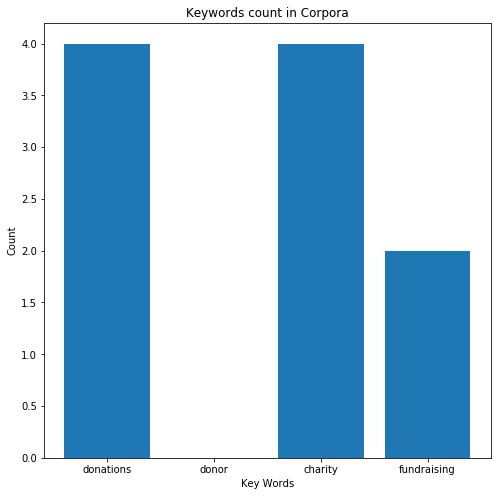

In [71]:
Y = []
for  i in keywords:
    Y.append(key_dictionary[i])
plt.figure(figsize=(8, 8))
plt.bar(keywords, Y)
plt.title("Keywords count in Corpora")
plt.ylabel("Count")
plt.xlabel("Key Words")
plt.show()

## Using NLTK for extraction

In [18]:
import nltk
from nltk.stem import WordNetLemmatizer # If we want to lemmatize the words. (Not used in this notebook)
from nltk.tokenize import TweetTokenizer # TweetTokenizer  (Not used in this notebook)
from nltk.tokenize import word_tokenize # Word Tokenization
from nltk.stem import PorterStemmer # Stemming the words to root part of the word
from nltk.corpus import stopwords # Premoving the stopping words

### If you are running for the first time uncomment the following cell and download then comment after successful execution
(98 MB)

In [55]:
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('stopwords')

Setting the Stop words to English (Check Documentation for other languages)

In [56]:
stop_words = set(stopwords.words('english'))

## Testing before applying to whole dataset

Word Tokenization

In [73]:
text = fire.text[0]
tokens = word_tokenize(text)
print(tokens) 

['Have', 'you', 'thought', 'about', 'how', 'we', '’', 'll', 'meet', 'the', '21st', 'Century', 'challenges', 'of', 'climate', 'change', ',', 'plus', 'food', ',', 'water', 'and', 'energy', 'security', '?', 'Australia', 'needs', 'to', 'look', 'at', 'its', 'landscapes', 'in', 'new', 'ways', ':', 'https', ':', '//t.co/WiUZsDSh2S', '#', 'ClimateChange', '#', 'Sustainability', 'https', ':', '//t.co/jnvhN1cu6r']


Stemming

In [74]:
st_list = []
ps = PorterStemmer()
for w in tokens: 
    st = ps.stem(w)
    st_list.append(st)
print(st_list)

['have', 'you', 'thought', 'about', 'how', 'we', '’', 'll', 'meet', 'the', '21st', 'centuri', 'challeng', 'of', 'climat', 'chang', ',', 'plu', 'food', ',', 'water', 'and', 'energi', 'secur', '?', 'australia', 'need', 'to', 'look', 'at', 'it', 'landscap', 'in', 'new', 'way', ':', 'http', ':', '//t.co/wiuzsdsh2', '#', 'climatechang', '#', 'sustain', 'http', ':', '//t.co/jnvhn1cu6r']


Removing Stopping words

In [75]:
filtered_sentence = [w for w in st_list if not w in stop_words] 
print(filtered_sentence) 

['thought', '’', 'meet', '21st', 'centuri', 'challeng', 'climat', 'chang', ',', 'plu', 'food', ',', 'water', 'energi', 'secur', '?', 'australia', 'need', 'look', 'landscap', 'new', 'way', ':', 'http', ':', '//t.co/wiuzsdsh2', '#', 'climatechang', '#', 'sustain', 'http', ':', '//t.co/jnvhn1cu6r']


## Applying to Dataset

Following are the functions for tokenisation, stemming and removing stopping words

In [76]:
def tokenize_txt(text):
    return word_tokenize(text)

In [77]:
def stem_txt(tokens):
    st_list = []
    ps = PorterStemmer() 
    for w in tokens: 
        st_list.append(ps.stem(w))
    return st_list

In [78]:
def rm_stop_words(token):
    return [w for w in token if not w in stop_words] 

#### Stemming th keywords to match stemmed list

In [79]:
stemed_keywords = stem_txt(keywords)

#### Combination of above function to apply on the dataset

In [80]:
def filter_text(text):
    return rm_stop_words(stem_txt(tokenize_txt(text)))

In [81]:
cmt["filter_text"] = cmt["text"].apply(filter_text)
cmt.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,filter_text
0,1235716715415105536,Australia_21,Have you thought about how we’ll meet the 21st...,Thu Mar 05 23:59:58 +0000 2020,05/03/2020 23:59:58,NaN,NaN,NaN,NaN,186716353,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",http://pbs.twimg.com/profile_images/7631995434...,2612.0,1959.0,Canberra,http://twitter.com/Australia_21/statuses/12357...,"{""hashtags"":[{""text"":""ClimateChange"",""indices""...","[thought, ’, meet, 21st, centuri, challeng, cl..."
1,1235716674420006912,Shirley08391760,RT @The_taX_Files: Not only did #ScottyFomMark...,Thu Mar 05 23:59:48 +0000 2020,05/03/2020 23:59:48,NaN,NaN,NaN,NaN,1122054681180565505,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1134742705...,261.0,256.0,"Jindabyne, New South Wales",http://twitter.com/Shirley08391760/statuses/12...,"{""hashtags"":[{""text"":""ScottyFomMarketing"",""ind...","[RT, @, the_tax_fil, :, onli, #, scottyfommark..."
2,1235716603825672192,aileenwalsh16,RT @terraconcern: Professor Will Steffen gave ...,Thu Mar 05 23:59:31 +0000 2020,05/03/2020 23:59:31,NaN,NaN,NaN,NaN,3024513774,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1206032443...,732.0,1650.0,"Melbourne, Victoria",http://twitter.com/aileenwalsh16/statuses/1235...,"{""hashtags"":[{""text"":""ClimateChange"",""indices""...","[RT, @, terraconcern, :, professor, steffen, g..."
3,1235716581264633856,RAAPTI,RT @zartajgulwazir: وزیر اعظم موسمیاتی تبدیلی ...,Thu Mar 05 23:59:26 +0000 2020,05/03/2020 23:59:26,NaN,NaN,NaN,NaN,802303884995731456,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1237871731...,753.0,1264.0,"Lahore, Pakistan",http://twitter.com/RAAPTI/statuses/12357165812...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...","[RT, @, zartajgulwazir, :, وزیر, اعظم, موسمیات..."
4,1235716553070366721,prollyhalal,RT @majidahhashim: Thousands of #RedJellyfish ...,Thu Mar 05 23:59:19 +0000 2020,05/03/2020 23:59:19,NaN,NaN,NaN,NaN,522793362,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1140563800...,539.0,680.0,NaN,http://twitter.com/prollyhalal/statuses/123571...,"{""hashtags"":[{""text"":""RedJellyfish"",""indices"":...","[RT, @, majidahhashim, :, thousand, #, redjell..."


In [82]:
fire["filter_text"] = fire["text"].apply(filter_text)
fire.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,filter_text
0,1235716715415105536,Australia_21,Have you thought about how we’ll meet the 21st...,Thu Mar 05 23:59:58 +0000 2020,05/03/2020 23:59:58,NaN,NaN,NaN,NaN,186716353,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",http://pbs.twimg.com/profile_images/7631995434...,2612.0,1959.0,Canberra,http://twitter.com/Australia_21/statuses/12357...,"{""hashtags"":[{""text"":""ClimateChange"",""indices""...","[thought, ’, meet, 21st, centuri, challeng, cl..."
1,1235716674420006912,Shirley08391760,RT @The_taX_Files: Not only did #ScottyFomMark...,Thu Mar 05 23:59:48 +0000 2020,05/03/2020 23:59:48,NaN,NaN,NaN,NaN,1122054681180565505,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1134742705...,261.0,256.0,"Jindabyne, New South Wales",http://twitter.com/Shirley08391760/statuses/12...,"{""hashtags"":[{""text"":""ScottyFomMarketing"",""ind...","[RT, @, the_tax_fil, :, onli, #, scottyfommark..."
2,1235716603825672192,aileenwalsh16,RT @terraconcern: Professor Will Steffen gave ...,Thu Mar 05 23:59:31 +0000 2020,05/03/2020 23:59:31,NaN,NaN,NaN,NaN,3024513774,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1206032443...,732.0,1650.0,"Melbourne, Victoria",http://twitter.com/aileenwalsh16/statuses/1235...,"{""hashtags"":[{""text"":""ClimateChange"",""indices""...","[RT, @, terraconcern, :, professor, steffen, g..."
3,1235716581264633856,RAAPTI,RT @zartajgulwazir: وزیر اعظم موسمیاتی تبدیلی ...,Thu Mar 05 23:59:26 +0000 2020,05/03/2020 23:59:26,NaN,NaN,NaN,NaN,802303884995731456,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1237871731...,753.0,1264.0,"Lahore, Pakistan",http://twitter.com/RAAPTI/statuses/12357165812...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...","[RT, @, zartajgulwazir, :, وزیر, اعظم, موسمیات..."
4,1235716553070366721,prollyhalal,RT @majidahhashim: Thousands of #RedJellyfish ...,Thu Mar 05 23:59:19 +0000 2020,05/03/2020 23:59:19,NaN,NaN,NaN,NaN,522793362,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1140563800...,539.0,680.0,NaN,http://twitter.com/prollyhalal/statuses/123571...,"{""hashtags"":[{""text"":""RedJellyfish"",""indices"":...","[RT, @, majidahhashim, :, thousand, #, redjell..."


In [83]:
amz["filter_text"] = amz["text"].apply(filter_text)
amz.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,filter_text
0,1235091941731098625,fabioruivo,.@CBF_Futebol @RedeGlobo @Ambev @CocaCola @ita...,Wed Mar 04 06:37:20 +0000 2020,04/03/2020 06:37:20,NaN,NaN,NaN,NaN,17015247,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1164275859...,793,282,Pale Blue Dot,http://twitter.com/fabioruivo/statuses/1235091...,"{""hashtags"":[{""text"":""WorldCup2014"",""indices"":...","[., @, cbf_futebol, @, redeglobo, @, ambev, @,..."
1,1235071327775539200,jaimevargasnae,RT @confeniae1: En las profundidades de la sel...,Wed Mar 04 05:15:25 +0000 2020,04/03/2020 05:15:25,NaN,NaN,NaN,NaN,890896112642646016,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/9135326966...,37509,192,"Morona Santiago, Ecuador",http://twitter.com/jaimevargasnae/statuses/123...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...","[RT, @, confeniae1, :, En, la, profundidad, de..."
2,1234968672856428544,WaoResistencia,RT @confeniae1: En las profundidades de la sel...,Tue Mar 03 22:27:30 +0000 2020,03/03/2020 22:27:30,NaN,NaN,NaN,NaN,1100052094365720576,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1100056401...,3237,865,NaN,http://twitter.com/WaoResistencia/statuses/123...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...","[RT, @, confeniae1, :, En, la, profundidad, de..."
3,1234963918734417928,confeniae1,En las profundidades de la selva amazónica hab...,Tue Mar 03 22:08:37 +0000 2020,03/03/2020 22:08:37,NaN,NaN,1.321463e+09,confeniae1,1321462820,1.234964e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/9964613968...,33941,991,Amazonía Ecuatoriana,http://twitter.com/confeniae1/statuses/1234963...,"{""hashtags"":[{""text"":""AmazoníaSagrada"",""indice...","[En, la, profundidad, de, la, selva, amazónica..."
4,1234963918734417928,confeniae1,En las profundidades de la selva amazónica hab...,Tue Mar 03 22:08:37 +0000 2020,03/03/2020 22:08:37,NaN,NaN,1.321463e+09,confeniae1,1321462820,1.234964e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/9964613968...,33941,991,Amazonía Ecuatoriana,http://twitter.com/confeniae1/statuses/1234963...,"{""hashtags"":[{""text"":""AmazoníaSagrada"",""indice...","[En, la, profundidad, de, la, selva, amazónica..."


## Counting again. 

In [88]:
key_dictionary = dict()
requrired_dataset = pd.DataFrame()
for i in stemed_keywords:
    cmt_filtered = cmt[cmt.filter_text.apply(lambda x: i in x)]
    fire_filtered = fire[fire.filter_text.apply(lambda x: i in x)]
    amz_filtered = amz[amz.filter_text.apply(lambda x: i in x)]
    requrired_dataset = pd.concat([requrired_dataset, cmt_filtered, fire_filtered, amz_filtered], axis="rows")
    key_dictionary[i] = key_dictionary.get(i, 0) + cmt_filtered.shape[0] + fire_filtered.shape[0] + amz_filtered.shape[0]  
print(key_dictionary)

{'donat': 22, 'donor': 0, 'chariti': 4, 'fundrais': 2}


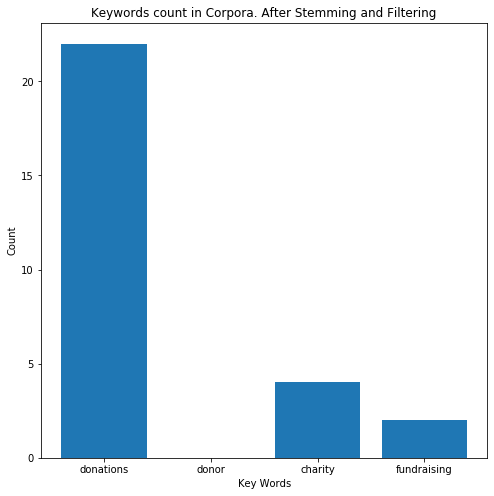

In [89]:
Y = []
for  i in range(len(keywords)):
    Y.append(key_dictionary[stemed_keywords[i]])
plt.figure(figsize=(8, 8))
plt.bar(keywords, Y)
plt.title("Keywords count in Corpora. After Stemming and Filtering")
plt.ylabel("Count")
plt.xlabel("Key Words")
plt.show()

### Checking the Required Dataset

Reseting Index because after concatination it will be index of those rows which are appended. So we need to reset it to have unique numbering from index 0

In [94]:
requrired_dataset.reset_index(inplace=True)

In [97]:
requrired_dataset.shape

(28, 20)

#### Evaluvating the output. 

Here is an example of output _(Indexed at 1. Index Starts from 0. Ends at the 28)_

In [98]:
requrired_dataset.text[1]

'RT @PeteDominick: Sen. Jim Inhofe brought a snowball to the senate floor to disprove #ClimateChange. He loves fossil fuels because he is one. Donate and support his opponent @abbybroyles https://t.co/zzBfcXDWMg'